In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


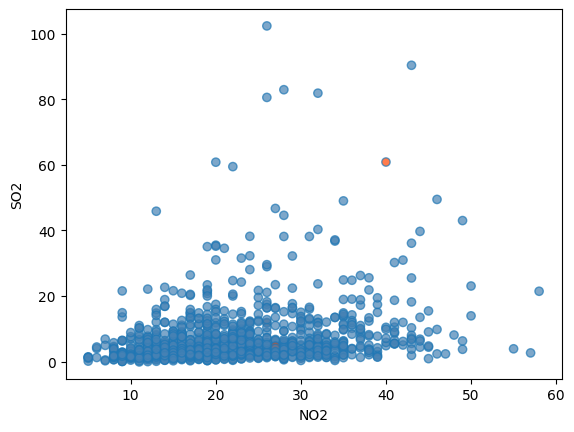

In [2]:
cinci_pollution = pollution[pollution.city == 'Cincinnati']

# Make an array of colors based upon if a row is a given day
cinci_colors = ['orangered' if day == 38 else 'steelblue'
                    for day in cinci_pollution.day]
# Plot with additional scatter plot argument facecolors
p = sns.regplot(x='NO2',
                y='SO2',
                data = cinci_pollution,
                fit_reg=False,
                scatter_kws={'facecolors': cinci_colors,'alpha': 0.7})

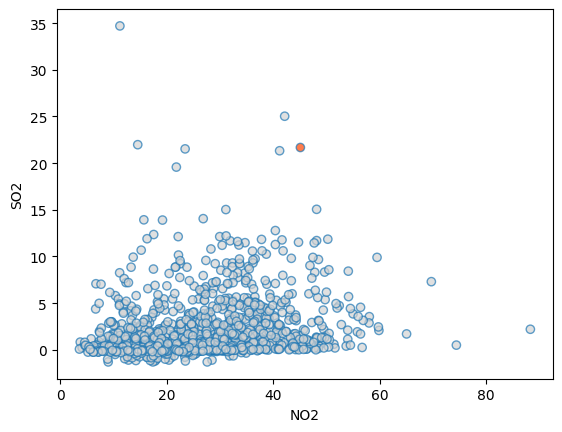

In [3]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

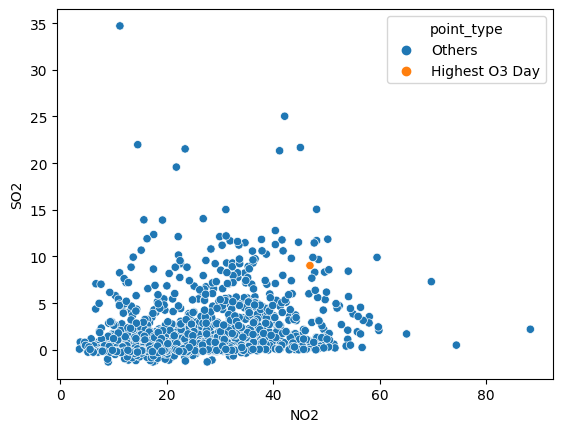

In [4]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)
plt.show()

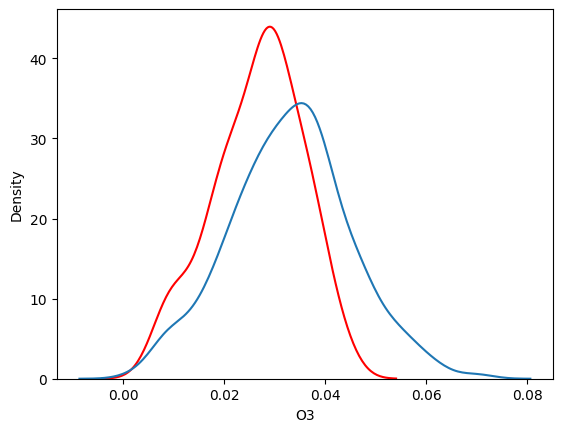

In [10]:
pollution_nov = pollution[pollution.month == 10]
sns.kdeplot(pollution_nov[pollution_nov.city == 'Denver'].O3, color = 'red')
sns.kdeplot(pollution_nov[pollution_nov.city != 'Denver'].O3)
plt.show()

## Comparing groups

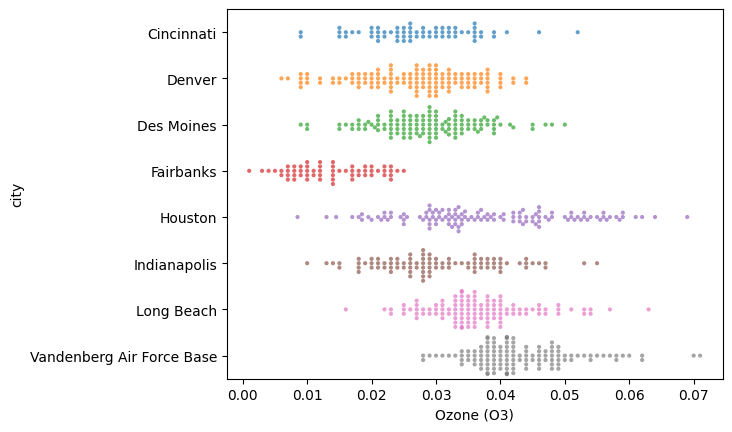

In [24]:
pollution_nov = pollution[pollution.month == 10]
sns.swarmplot(y="city", x="O3", data=pollution_nov, size=3, hue='city', alpha=0.7, legend=False)
plt.xlabel("Ozone (O3)")
plt.show()

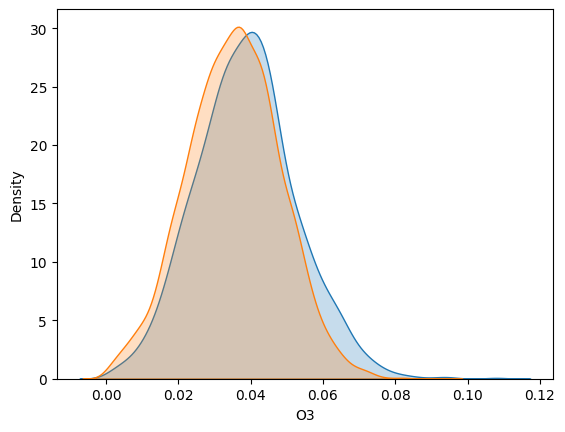

In [26]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            fill = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label           
            fill = True,
            label = 'other years')
plt.show()

Improving a kde plot

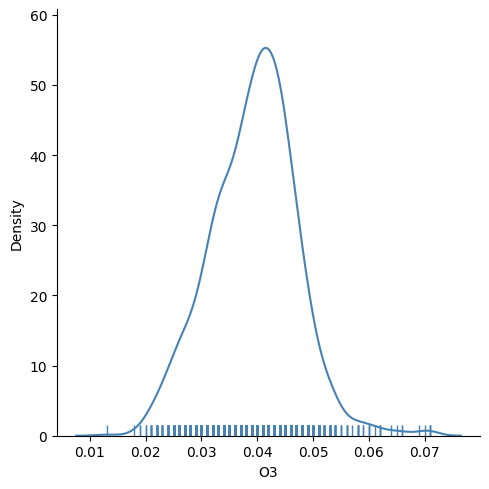

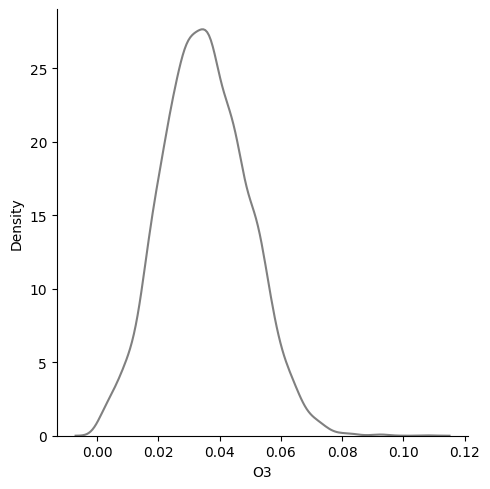

In [33]:
sns.displot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
            label = 'Vandenberg',
            color = 'steelblue',
            # set type to shaded kde
            kind = 'kde',  
            # Turn on rugplot
            rug = True)

sns.displot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3,
            label = 'Other cities',
            kind = 'kde',
            color = 'gray')
plt.show()

Beeswarms (swarmplots)

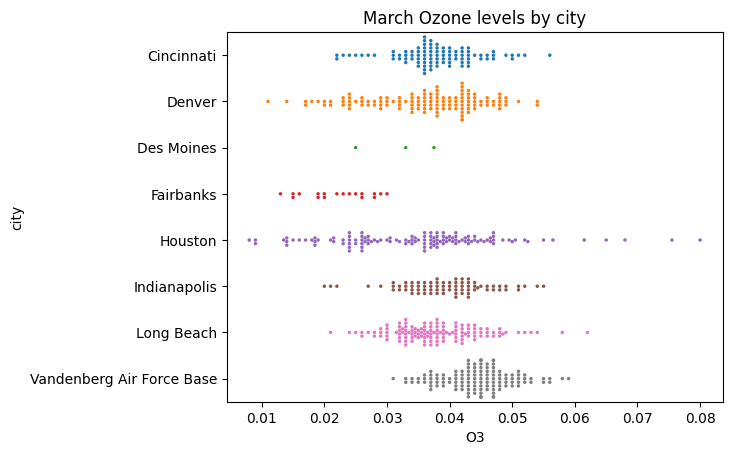

In [37]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = "O3", 
              data = pollution_mar,
              hue='city',
              legend=False, 
              # Decrease the size of the points to avoid crowding 
              size = 2.5)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()